In [3]:
## Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('data sets/mergedData.csv')
df['Test_Type']=df['Test_Type'].str.lower()
df['Signal_Strength'] =df['Signal_Strength'].abs()
df['Signal_Strength'] = df['Signal_Strength']*(-1)
df=df.sample(frac=0.0002, random_state=1011)

print(df)



          Operator Technology Test_Type  Data_Speed  Signal_Strength  \
14042075       JIO         4G    upload    0.027433            -61.0   
4088278     AIRTEL         4G    upload    0.002271            -99.0   
5977807        JIO         4G  download    0.020294            -12.0   
6360702        JIO         4G    upload    0.059809            -34.0   
8579457        JIO         4G  download    0.006201           -102.0   
...            ...        ...       ...         ...              ...   
12565517       JIO         4G  download    0.059441            -93.0   
4284103        JIO         4G  download    0.133383            -88.0   
8500676        JIO         4G  download    0.002675           -102.0   
3841377   VODAFONE         4G  download    0.003725           -110.0   
8389487     AIRTEL         4G  download    0.069113           -107.0   

                     LSA Month&Year  
14042075     Maharashtra     1/2/19  
4088278      West Bengal     1/5/18  
5977807          Hary

(3614,)
(3614,)


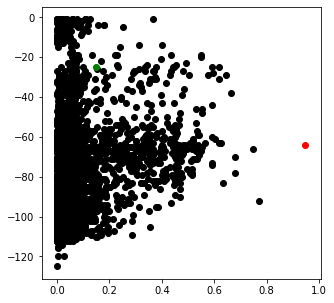

In [4]:
print(df['Data_Speed'].shape)
print(df['Signal_Strength'].shape)
i=0
np.random.seed(200)
k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.uniform(0,1), np.random.randint(-80, 0)]
    for i in range(k)
}    
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Data_Speed'], df['Signal_Strength'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

         Operator Technology Test_Type  Data_Speed  Signal_Strength  \
14042075      JIO         4G    upload    0.027433            -61.0   
4088278    AIRTEL         4G    upload    0.002271            -99.0   
5977807       JIO         4G  download    0.020294            -12.0   
6360702       JIO         4G    upload    0.059809            -34.0   
8579457       JIO         4G  download    0.006201           -102.0   

                  LSA Month&Year  distance_from_1  distance_from_2  closest  \
14042075  Maharashtra     1/2/19         3.137956        36.000204        1   
4088278   West Bengal     1/5/18        35.012765        74.000145        1   
5977807       Haryana     1/6/18        52.008268        13.000633        2   
6360702         Bihar     1/6/18        30.013134         9.000438        2   
8579457       Gujarat     1/7/18        38.011660        77.000132        1   

         color  
14042075     r  
4088278      r  
5977807      g  
6360702      g  
8579457      

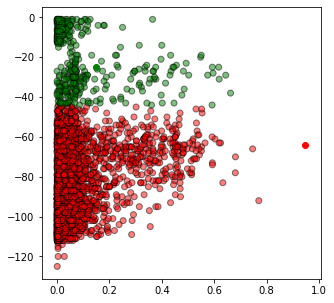

In [5]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['Data_Speed'] - centroids[i][0]) ** 2
                + (df['Signal_Strength'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda Data_Speed: int(Data_Speed.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda Data_Speed: colmap[Data_Speed])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Data_Speed'], df['Signal_Strength'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

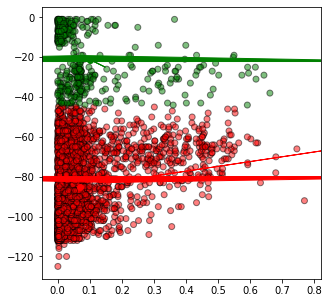

In [6]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['Data_Speed'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['Signal_Strength'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Data_Speed'], df['Signal_Strength'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

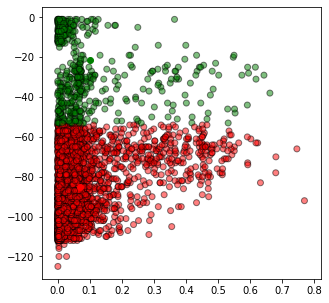

In [10]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Data_Speed'], df['Signal_Strength'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()

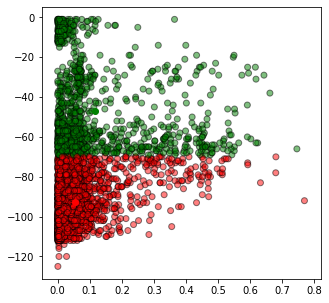

In [11]:
# Continue until all assigned categories don't change any more
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Data_Speed'], df['Signal_Strength'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

plt.show()